To compare TRI

Read each raster a X buffer 
Get the R2 and the RMSE from the metrics (error result file)
Plot each TRI histogram shape
Sumarize median


In [12]:
#Test

import matplotlib.pyplot as plt

tif_file='C:/Users/amgomez/Dropbox/Research/LOCSS/other_lakes/Selected_lakes/SRTM/STRM_Buffer/TRI_1km_660400.tif'
img = plt.imread(tif_file)

# img.plot.hist(ax=ax,
#                        color="purple",
#                        bins=30)

In [49]:
import rasterio
from matplotlib import pyplot
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import numpy as np
import os
tif_file='/home/angelica/Dropbox/Research/LOCSS/other_lakes/Selected_lakes/SRTM/STRM_Buffer/TRI_1km_660400.tif'
dir_srtm='/home/angelica/Dropbox/Research/LOCSS/other_lakes/Selected_lakes/SRTM/STRM_Buffer/'

In [54]:
files = [f for f in os.listdir(dir_srtm) if os.path.isfile(os.path.join(dir_srtm, f))&(f.startswith('TRI')&f.endswith('.tif'))]

In [56]:
files_3km=[f for f in files if '3km' in f]

In [57]:
files_3km

['TRI_3km_PLH2.tif',
 'TRI_3km_2316.tif',
 'TRI_3km_LNK2.tif',
 'TRI_3km_HMT2.tif',
 'TRI_3km_BTN2.tif',
 'TRI_3km_12030.tif',
 'TRI_3km_BLB2.tif',
 'TRI_3km_12056.tif',
 'TRI_3km_CQK2.tif',
 'TRI_3km_19069.tif',
 'TRI_3km_660400.tif',
 'TRI_3km_2028.tif',
 'TRI_3km_2234.tif',
 'TRI_3km_SAW2.tif',
 'TRI_3km_QUL2.tif',
 'TRI_3km_KHB2.tif',
 'TRI_3km_SPA2.tif',
 'TRI_3km_MTN2.tif',
 'TRI_3km_19060.tif',
 'TRI_3km_SKT2.tif',
 'TRI_3km_12036.tif',
 'TRI_3km_MCW2.tif',
 'TRI_3km_CFN2.tif',
 'TRI_3km_DPK2.tif',
 'TRI_3km_1824.tif',
 'TRI_3km_MRP2.tif',
 'TRI_3km_19126.tif',
 'TRI_3km_RAW2.tif',
 'TRI_3km_PAW2.tif',
 'TRI_3km_12327.tif',
 'TRI_3km_PHN2.tif',
 'TRI_3km_TAB2.tif',
 'TRI_3km_RLH2.tif']

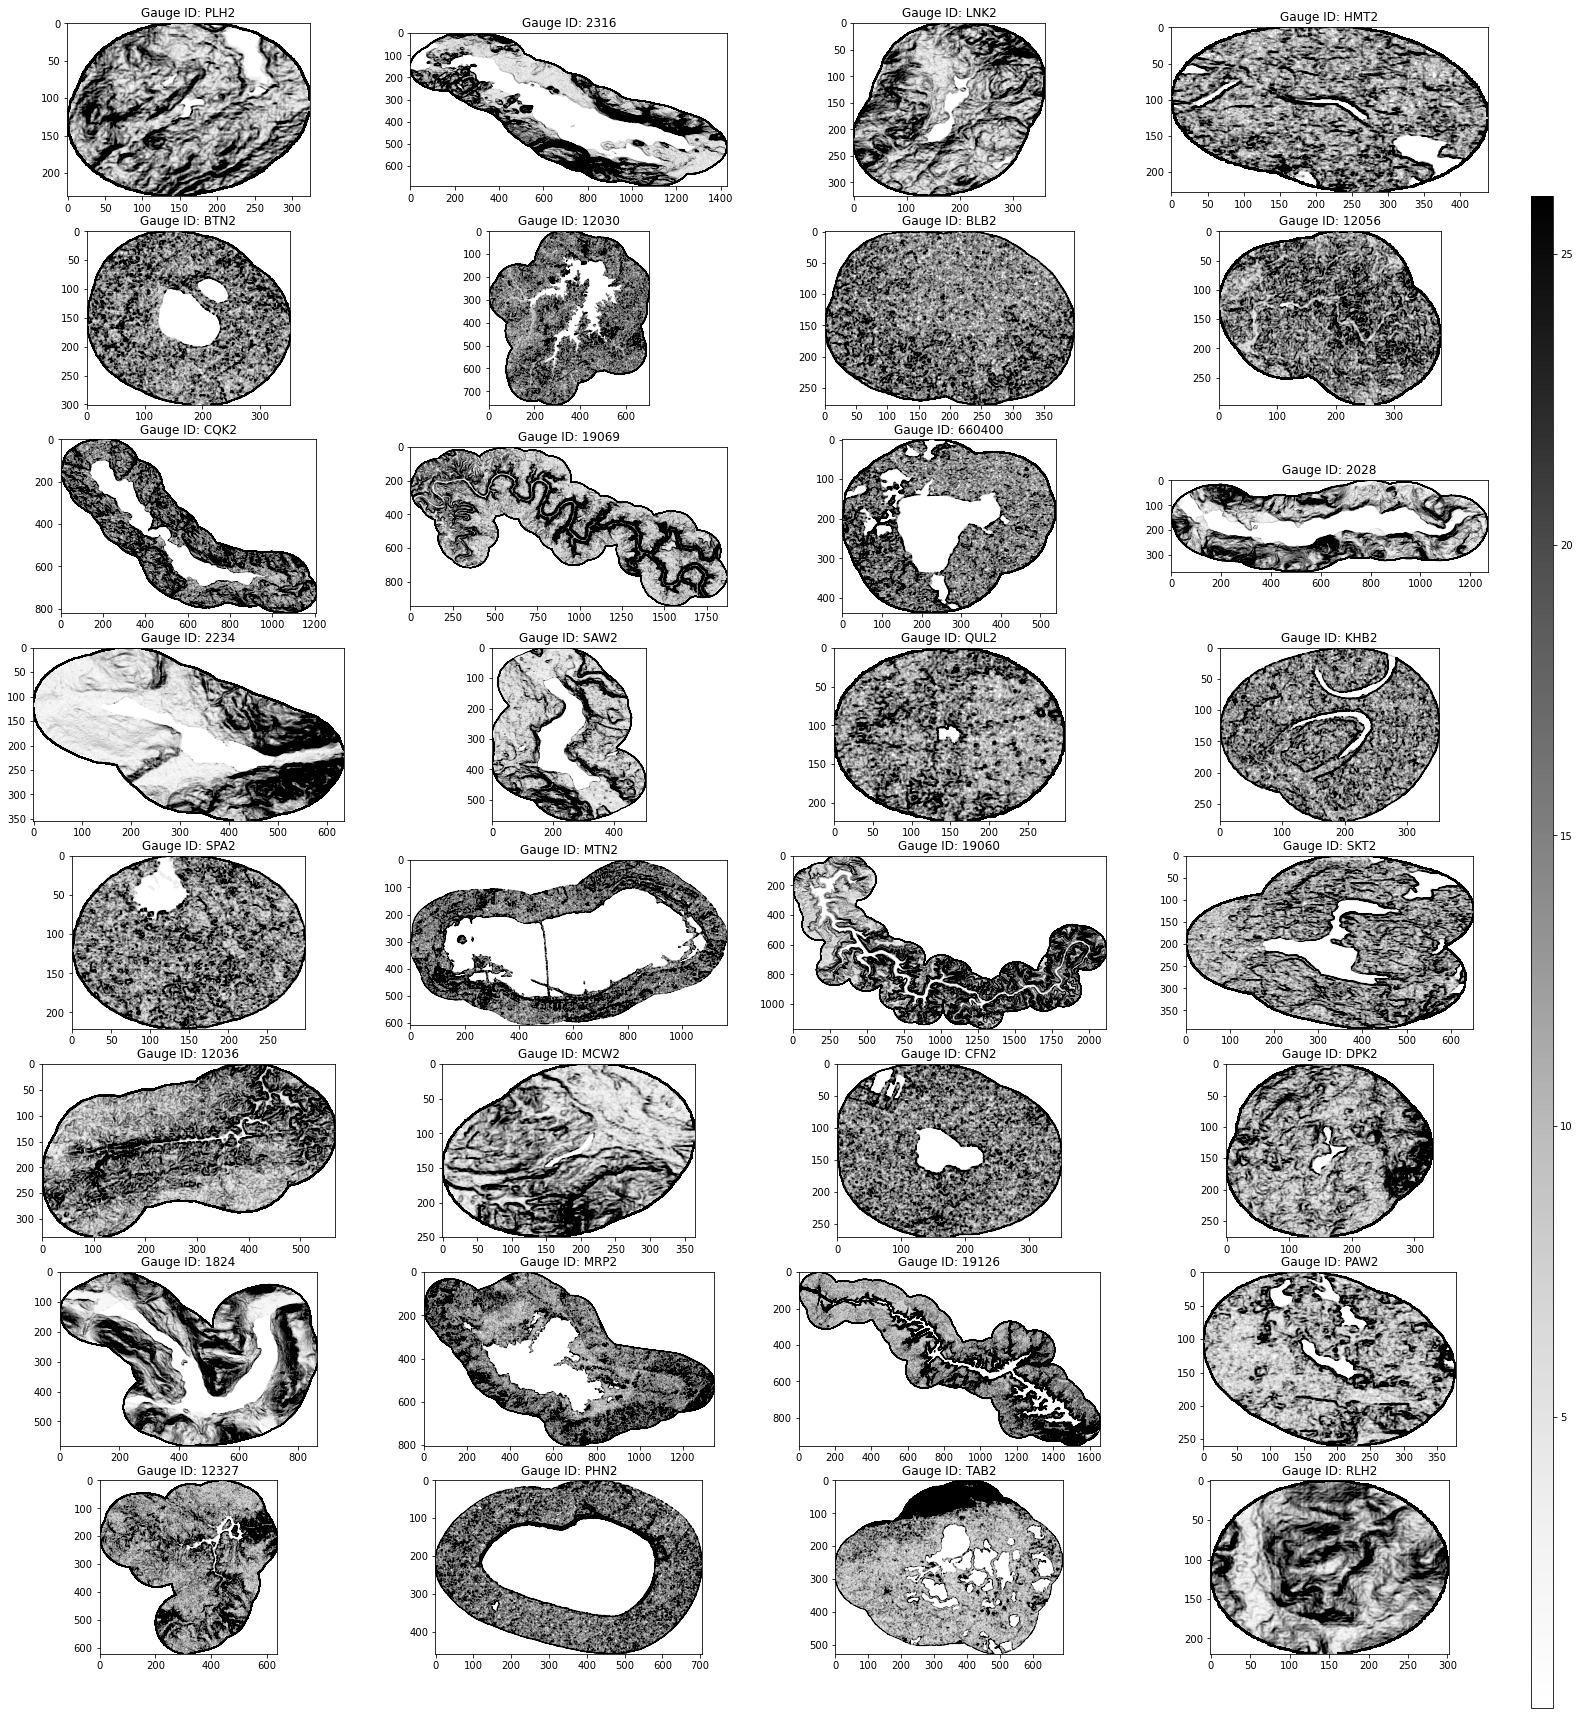

In [158]:

row_f=8
col_f=4
nfig=1
fig, axes = plt.subplots(nrows=row_f, ncols=col_f, figsize=(30, 30))
ax=0
ay=-1
rastervals=pd.DataFrame()

for f in files_3km:
    # im=plt.subplot(row_f,col_f,nfig) 
    
    src = rasterio.open(dir_srtm+f)
    rvalues=src.read(1)
    # ic(rvalues.shape)
    p90=np.percentile(rvalues,90)
    
    st_id=f.split('_')[2].split('.')[0]
    if st_id=='RAW2': #Taking RAW2 out since is not a valid lake
        continue
    vals=pd.DataFrame({st_id:rvalues[(rvalues>0) & (rvalues<p90)]})
    rastervals=pd.concat((rastervals,vals), axis=1)
# rvalues=rvalues[(rvalues>0) & (rvalues<p90)]
# rvalues.shape
    if ay<col_f-1:
        ay+=1
        # if ax==row_f:
        # ax+=1
    else:
        ay=0
        ax+=1
    # ic((ax,ay))
    # ax=axes[ax][ay]
    im=axes[ax][ay].imshow(rvalues, cmap='Greys',vmin=0.0001, vmax=p90)
    axes[ax][ay].set_title('Gauge ID: '+ st_id)
        
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.1, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)
        # title_obj = pyplot.title(f)
    # color_bar = pyplot.colorbar() 
plt.savefig('../data/results/TRI_3km_lakes.png')
plt.show()
    # nfig+=1

In [159]:
rastervals_3km=rastervals
rastervals_3km.describe().reset_index()

index          PLH2           2316          LNK2          HMT2  \
0  count  49885.000000  252404.000000  76996.000000  64274.000000   
1   mean      8.564504       5.287929      9.898169      3.226426   
2    std      3.752001       2.928456      4.454277      1.211264   
3    min      1.000000       1.000000      1.000000      1.000000   
4    25%      5.656854       2.828427      6.324555      2.236068   
5    50%      8.246211       4.582576      9.486833      3.000000   
6    75%     11.269427       7.483315     13.238193      4.123106   
7    max     16.970562      11.916375     19.646883      6.000000   

           BTN2          12030          BLB2         12056           CQK2  \
0  64295.000000  287284.000000  78695.000000  73054.000000  250470.000000   
1      3.378318       4.435453      2.658073      7.418336       4.281525   
2      1.154598       1.498467      0.845507      2.566869       1.512722   
3      1.000000       1.000000      1.000000      1.000000       1.000000   
4      2.449490       3.316625      2.000000      5.477226       3.000000   
5      3.316625       4.358899      2.645751      7.416198       4.242640   
6      4.242640       5.567764      3.316625      9.380832       5.477226   
7      5.830952       7.416198      4.472136     12.449900       7.141428   

   ...          CFN2          DPK2           1824           MRP2  \
0  ...  61816.000000  60736.000000  234388.000000  389242.000000   
1  ...      3.289805      5.261216      21.572611       2.951671   
2  ...      1.052889      2.174696      10.783759       1.011454   
3  ...      1.000000      1.000000       1.000000       1.000000   
4  ...      2.449490      3.605551      13.076696       2.236068   
5  ...      3.316625      5.000000      21.679483       2.828427   
6  ...      4.123106      6.782330      30.315012       3.741657   
7  ...      5.477226     10.295630      41.521080       5.000000   

           19126          PAW2          12327           PHN2           TAB2  \
0  400218.000000  61711.000000  217004.000000  130845.000000  184865.000000   
1       4.066011      4.378159       3.858587       2.561475       3.092469   
2       1.596656      2.040624       1.450208       0.763446       1.254122   
3       1.000000      1.000000       1.000000       1.000000       1.000000   
4       2.828427      2.828427       2.828427       2.000000       2.236068   
5       3.872983      4.000000       3.741657       2.449490       2.828427   
6       5.196152      5.656854       4.898980       3.162278       3.872983   
7       7.745967      9.591663       7.141428       4.000000       6.633250   

           RLH2  
0  45975.000000  
1     13.707307  
2      5.978341  
3      1.000000  
4      9.110434  
5     13.601471  
6     18.275667  
7     25.980762  

[8 rows x 33 columns]

In [ ]:
rastervals_3km.agg(mean=

In [161]:
r_median=rastervals_3km.median()
r_mean=rastervals_3km.mean()
r_max=rastervals_3km.max()
r_min=rastervals_3km.min()
r_count=rastervals_3km.count()
r_std=rastervals_3km.std()

PLH2       8.564504
2316       5.287929
LNK2       9.898169
HMT2       3.226426
BTN2       3.378318
12030      4.435453
BLB2       2.658073
12056      7.418336
CQK2       4.281525
19069     12.812555
660400     2.473210
2028      19.167797
2234       9.889504
SAW2       6.088907
QUL2       3.013583
KHB2       2.969794
SPA2       7.169432
MTN2       2.762349
19060     15.924159
SKT2       3.392591
12036     11.742742
MCW2       7.921839
CFN2       3.289805
DPK2       5.261216
1824      21.572611
MRP2       2.951671
19126      4.066011
PAW2       4.378159
12327      3.858587
PHN2       2.561475
TAB2       3.092469
RLH2      13.707307
dtype: float32

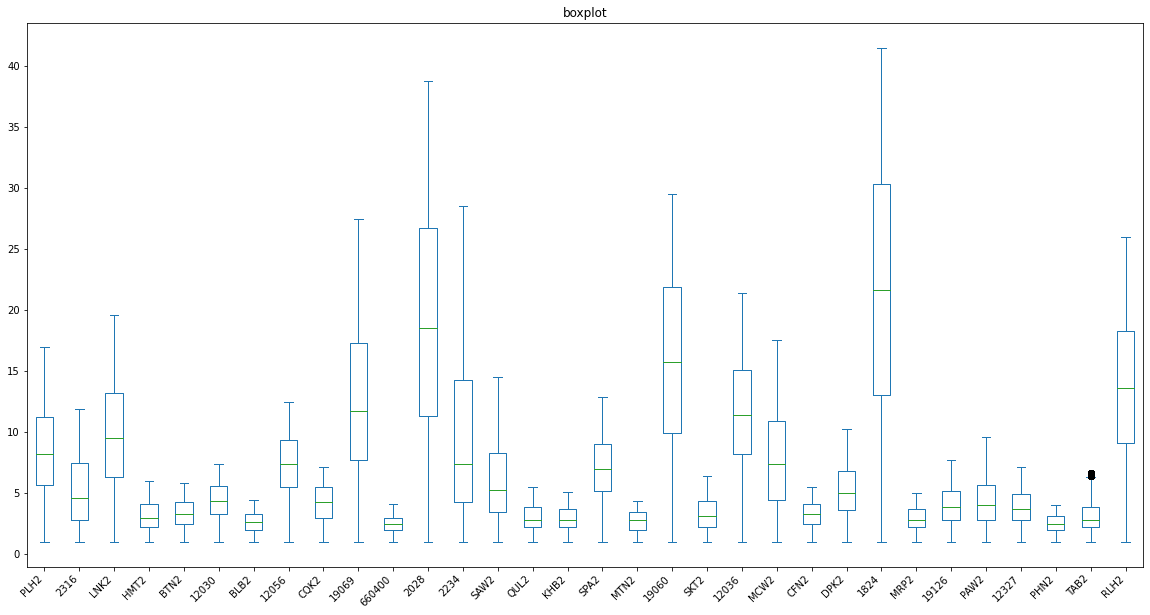

In [151]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [20, 10]

ax = rastervals_3km.plot(kind='box', title='boxplot')
for label in ax.get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')
        # title_obj = pyplot.title(f)
    # color_bar = pyplot.colorbar() 
plt.savefig('../data/results/TRI_3km_lakes_variability.png')
plt.show()
    # nfig+=1

In [153]:
files_1km=[f for f in files if '1km' in f]

In [155]:
len(files_1km)

36

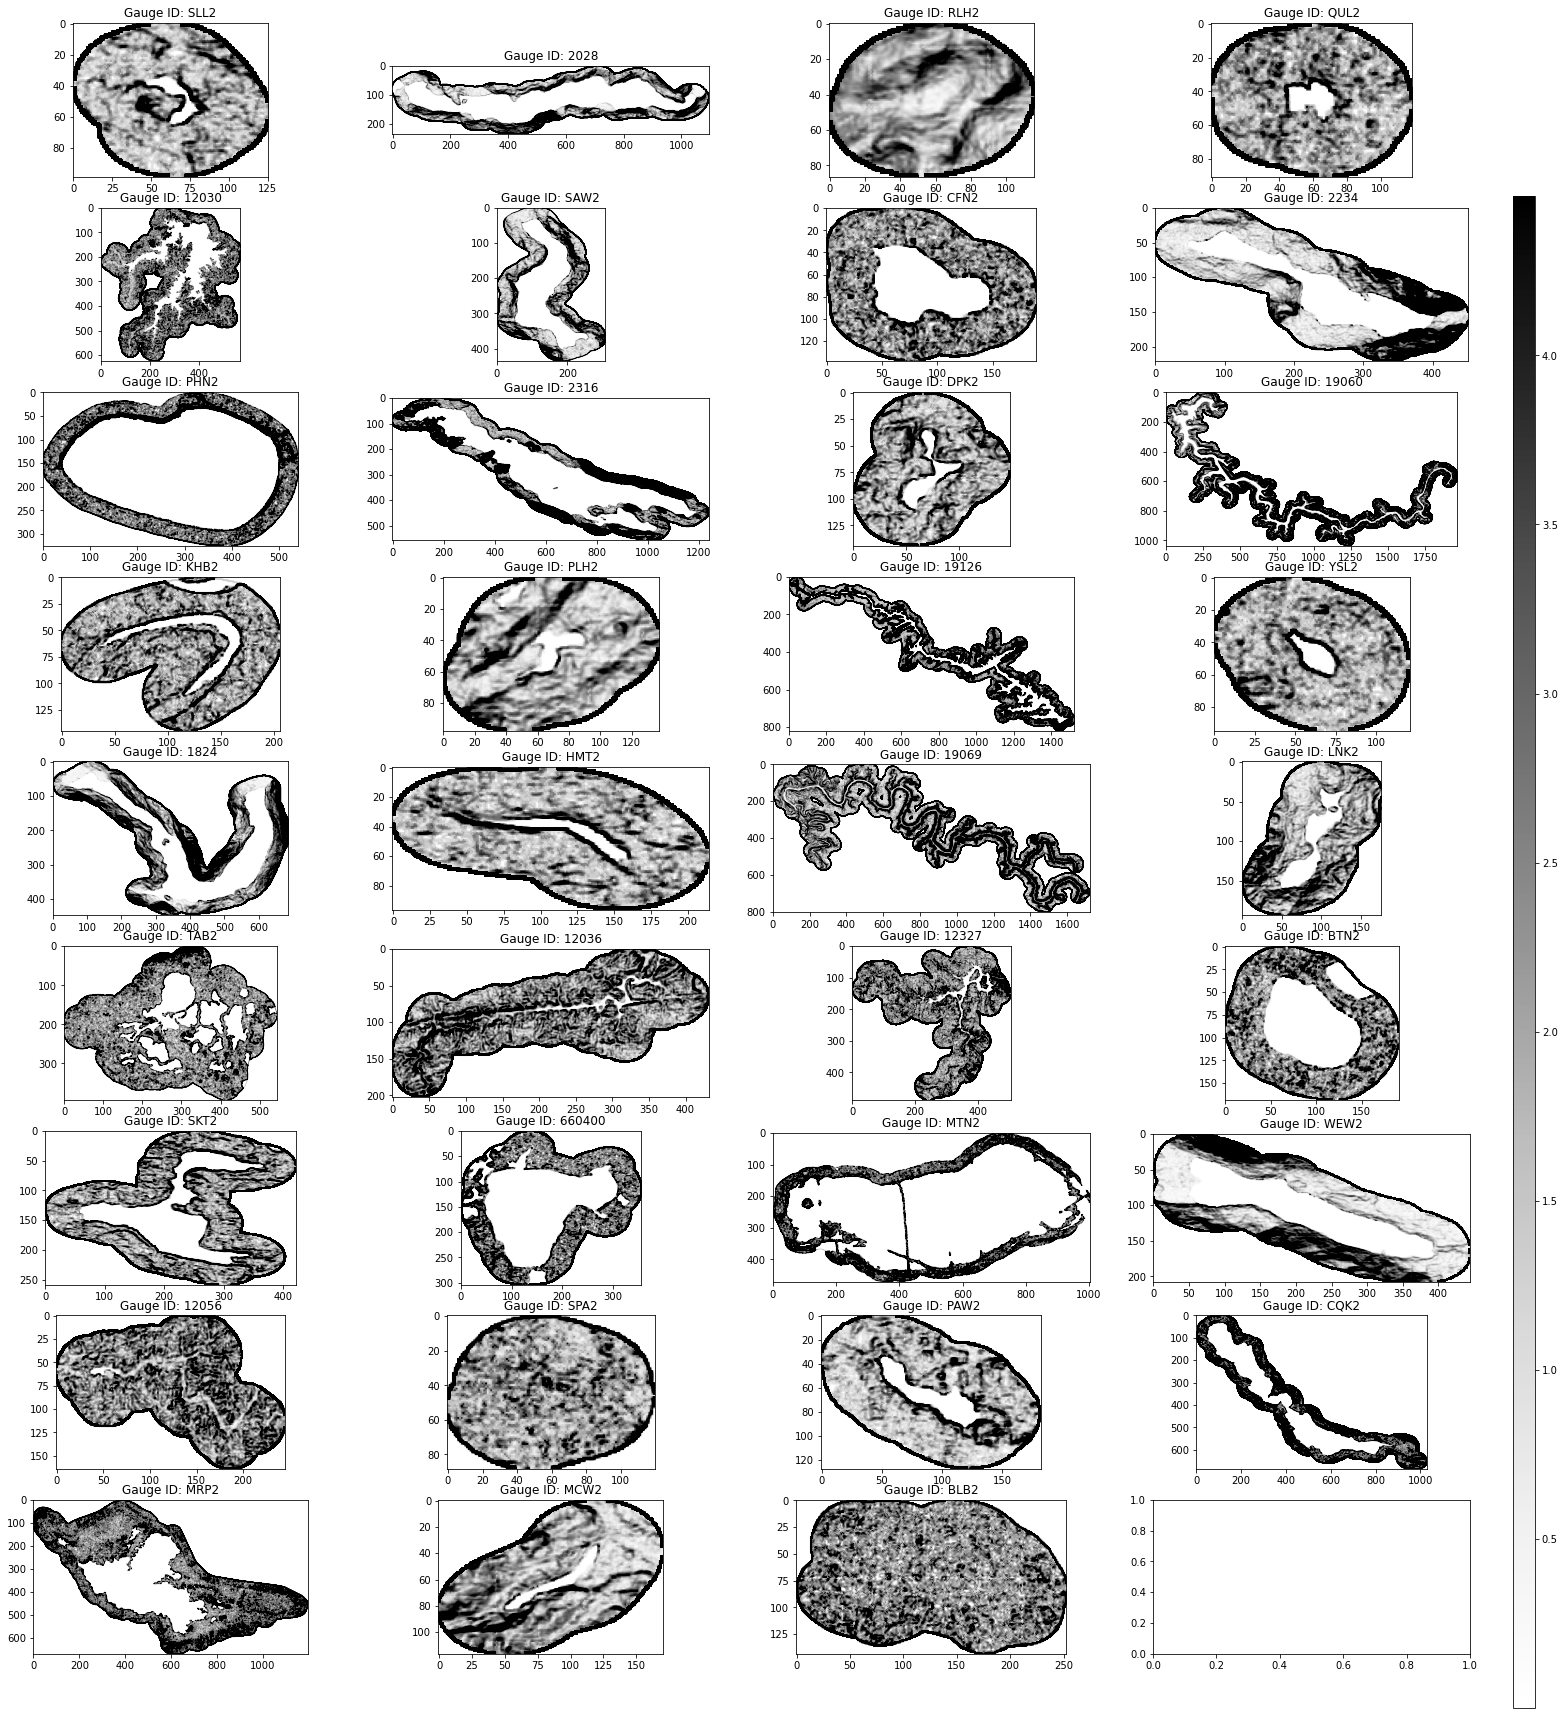

In [156]:

row_f=9
col_f=4
nfig=1
fig, axes = plt.subplots(nrows=row_f, ncols=col_f, figsize=(30, 30))
ax=0
ay=-1
rastervals=pd.DataFrame()

for f in files_1km:
    # im=plt.subplot(row_f,col_f,nfig) 
    
    src = rasterio.open(dir_srtm+f)
    rvalues=src.read(1)
    # ic(rvalues.shape)
    p90=np.percentile(rvalues,90)
    
    st_id=f.split('_')[2].split('.')[0]
    if st_id=='RAW2': #Taking RAW2 out since is not a valid lake
        continue
    vals=pd.DataFrame({st_id:rvalues[(rvalues>0) & (rvalues<p90)]})
    rastervals=pd.concat((rastervals,vals), axis=1)
# rvalues=rvalues[(rvalues>0) & (rvalues<p90)]
# rvalues.shape
    if ay<col_f-1:
        ay+=1
        # if ax==row_f:
        # ax+=1
    else:
        ay=0
        ax+=1
    # ic((ax,ay))
    # ax=axes[ax][ay]
    im=axes[ax][ay].imshow(rvalues, cmap='Greys',vmin=0.0001, vmax=p90)
    axes[ax][ay].set_title('Gauge ID: '+ st_id)
        
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.1, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)
        # title_obj = pyplot.title(f)
    # color_bar = pyplot.colorbar() 
plt.savefig('../data/results/TRI_1km_lakes.png')
plt.show()
    # nfig+=1

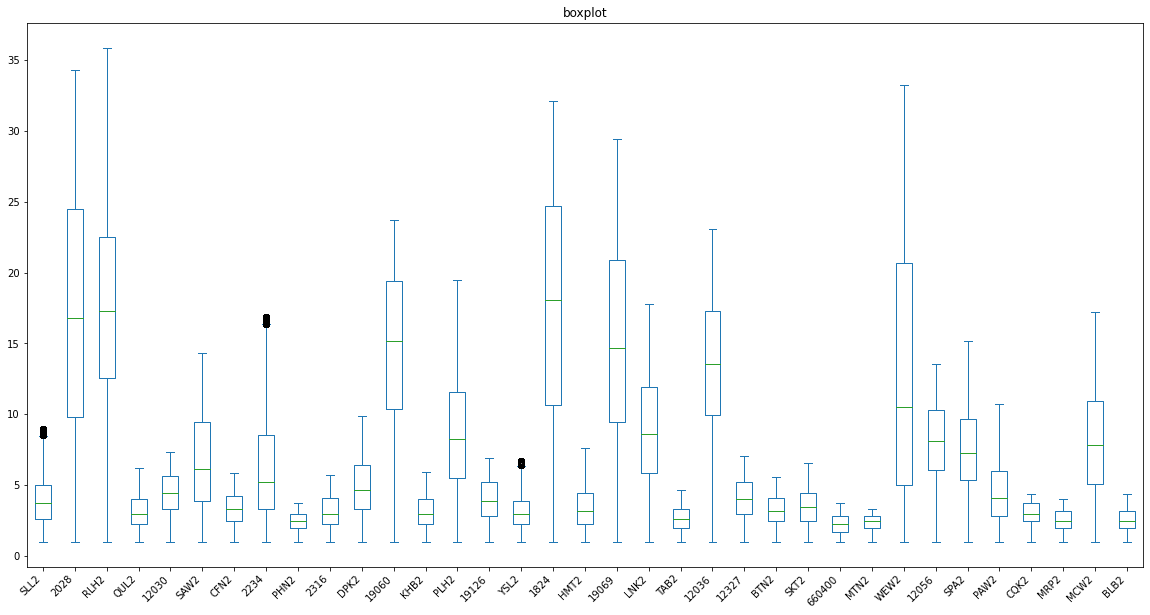

In [157]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [20, 10]

ax = rastervals.plot(kind='box', title='boxplot')
for label in ax.get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')
        # title_obj = pyplot.title(f)
    # color_bar = pyplot.colorbar() 
plt.savefig('../data/results/TRI_1km_lakes_variability.png')
plt.show()

ic| rvalues.shape: (528, 693)


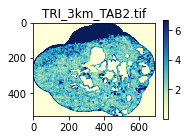

ic| rvalues.shape: (220, 302)


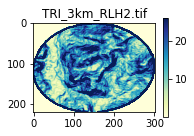

In [ ]:
from icecream import ic
row_f=2
col_f=2
nfig=1

fig, axes = plt.subplots(nrows=2, ncols=2)
fig = plt.figure(figsize=(20, 10))

for f in ['TRI_3km_TAB2.tif', 'TRI_3km_RLH2.tif']:
    im=plt.subplot(row_f,col_f,nfig) 
    src = rasterio.open(dir_srtm+f)
    rvalues=src.read(1)
    ic(rvalues.shape)
    p90=np.percentile(rvalues,90)
# rvalues=rvalues[(rvalues>0) & (rvalues<p90)]
# rvalues.shape
    pyplot.imshow(rvalues, cmap='YlGnBu',vmin=0.0001, vmax=p90)
    title_obj = pyplot.title(f)
    color_bar = pyplot.colorbar() 
    pyplot.show()

In [22]:
src.read(1).flatten().mean()

17.385874

In [20]:
len(src.read(1).flatten())

108224

In [31]:
rgt0=np.array([a for a in src.read(1).flatten() if a>0])

In [38]:
np.percentile(rgt0,50)#mean()

2.8284270763397217

In [27]:
band_max

0.0